# FashionMNIST

![gif](assets/embedding.gif)


You should solve the FashionMNIST problems and be able to recognize clothes thanks to AI.

	If necessary you can un-comment the next line and run it to install this notebook depedencies

In [212]:
pip install torch torchvision numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [213]:
import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [214]:
# Transform each image into tensor
transform = transforms.Compose([transforms.ToTensor()])

# Set the training loader
train_data = datasets.FashionMNIST('../data', train=True, download=True, transform=transform)
# Set the testing loader
test_data = datasets.FashionMNIST('../data', train=False, download=True, transform=transform)

# The dataset

 - `train_data` is only for training your model.
 - `test_data`  is only for testing your model.

## Shape

```python
train_data = [
	[image], [label] # 1st example
	[image], [label] # 2nd example
	[image], [label] # 3rd example
	[image], [label] # 4th example
	... # 4th example
]
```

There's 60 000 examples in the train set, and 10 000 in the test set

### Image

An image is 28*28 in black & white 

You can access the first image this way:

```python
image_0 = data[0][0]
```

### Label

A label is an integer between 0 and 9 (included) 

You can access the first label this way:

```python
label_0 = data[0][0]
```

Here is the detail of each label

| Label | Description |
|:-|:-:|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |



In [215]:
print("Train len : " + str(len(test_data)))
print("Test len : " + str(len(train_data)))

Train len : 10000
Test len : 60000


In [216]:
print("Image Size: " + str(train_data[0][0].shape))

Image Size: torch.Size([1, 28, 28])


In [217]:
label_dic = {
	0: "T-shirt/top",
	1: "Trouser",
	2 : "Pullover ",
	3 : "Dress ",
	4 : "Coat ",
	5 : "Sandal ",
	6 : "Shirt ",
	7 : "Sneaker ",
	8 : "Bag ",
	9 : "Ankle boot"
}

def plot_one_example(example):
	plt.imshow(example[0].view(28, 28), cmap="gray")
	plt.title("Label class {}: {}".format(example[1], label_dic[example[1]]))
	plt.show()

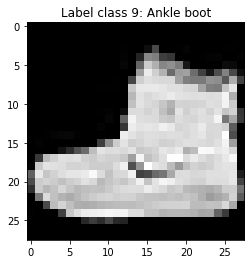

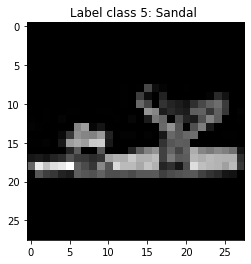

In [218]:
plot_one_example(train_data[0])
plot_one_example(train_data[-1])

In [219]:
# classes = ("T-shirt/top","Trouser","Pullover ","Dress ","Coat ","Sandal ","Shirt ", "Sneaker ","Bag ","Ankle boot")

# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()


# # get some random training images
# dataiter = iter(trainloader)
# images, labels = dataiter.next()

# # show images
# imshow(torchvision.utils.make_grid(images))
# # print labels
# print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


def f(x, y):
    return x*x + y*y

x = torch.tensor(3, dtype=torch.float, requires_grad=True)
y = torch.tensor(3, dtype=torch.float, requires_grad=True)


for i in range(100):
    result = x*x + y*y

    print(result)
    result.backward()

    with torch.no_grad():
        x -= 0.1*x.grad
        y -= 0.1*y.grad

    x.grad.zero_()
    y.grad.zero_()

print(x, y)


tensor(18., grad_fn=<AddBackward0>)
tensor(11.5200, grad_fn=<AddBackward0>)
tensor(7.3728, grad_fn=<AddBackward0>)
tensor(4.7186, grad_fn=<AddBackward0>)
tensor(3.0199, grad_fn=<AddBackward0>)
tensor(1.9327, grad_fn=<AddBackward0>)
tensor(1.2370, grad_fn=<AddBackward0>)
tensor(0.7916, grad_fn=<AddBackward0>)
tensor(0.5067, grad_fn=<AddBackward0>)
tensor(0.3243, grad_fn=<AddBackward0>)
tensor(0.2075, grad_fn=<AddBackward0>)
tensor(0.1328, grad_fn=<AddBackward0>)
tensor(0.0850, grad_fn=<AddBackward0>)
tensor(0.0544, grad_fn=<AddBackward0>)
tensor(0.0348, grad_fn=<AddBackward0>)
tensor(0.0223, grad_fn=<AddBackward0>)
tensor(0.0143, grad_fn=<AddBackward0>)
tensor(0.0091, grad_fn=<AddBackward0>)
tensor(0.0058, grad_fn=<AddBackward0>)
tensor(0.0037, grad_fn=<AddBackward0>)
tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0015, grad_fn=<AddBackward0>)
tensor(0.0010, grad_fn=<AddBackward0>)
tensor(0.0006, grad_fn=<AddBackward0>)
tensor(0.0004, grad_fn=<AddBackward0>)
tensor(0.0003, grad_fn=<Add

In [220]:
weights = torch.randn(784, 10, requires_grad=True)
test_dataset = torch.utils.data.DataLoader(test_data)
train_dataset = torch.utils.data.DataLoader(train_data)

print(weights.shape)

def test(weights, data_test):
    test_size = len(data_test.dataset)
    correct = 0

    for img_numbers, (data, target) in enumerate(data_test):
        # print(batch_idx, data.shape, target.shape)
        data = data.view((-1, 28*28))
        # print(batch_idx, data.shape, target.shape)

        activations = torch.matmul(data, weights)
        softmax = F.softmax(activations, dim=1)
        prediction = softmax.argmax(dim=1, keepdim=True)
        correct_predictions = prediction.eq(target.view_as(prediction)).sum().item()
        correct += correct_predictions
    accuracy = correct / test_size
    print(f"accuracy: on test: {accuracy*100}%")

test(weights, test_dataset)

torch.Size([784, 10])
accuracy: on test: 15.36%


In [221]:
##

it = 0
for img_number, (data, target) in enumerate(train_dataset):

    if weights.grad is not None:
        weights.grad.zero_()
    data = data.view((-1, 28*28))
    # print(data.shape, target.shape)
    activations = torch.matmul(data, weights)
    # print(activations.shape)
    log_softmax = F.log_softmax(activations, dim=1)
    loss = F.nll_loss(log_softmax, target)
    print("\r",loss.item(), end=' ')

    loss.backward()

    with torch.no_grad():
        weights -= 0.1*weights.grad
    it += 1

    if not it % 100:
        test(weights, test_dataset)

    if it > 5000:
        break


 16.177162170410156 -06 accuracy: on test: 34.699999999999996%
 0.0 38926315307617 07  accuracy: on test: 50.870000000000005%
 0.0 80090713500977 6   accuracy: on test: 48.39%
 5.710492134094238   66 accuracy: on test: 43.69%
 15.81380844116211 485  accuracy: on test: 43.08%
 4.768370445162873e-07  accuracy: on test: 54.2%
 0.05836579203605652 05 accuracy: on test: 64.28%
 0.0 9896090244874e-05  accuracy: on test: 56.56%
 0.07140687108039856 05 accuracy: on test: 64.05%
 0.007055250462144613 7 accuracy: on test: 63.449999999999996%
 1.8341516256332397 07  accuracy: on test: 65.64%
 0.0 2600959512056e-06  accuracy: on test: 59.58%
 10.913652420043945 53  accuracy: on test: 60.540000000000006%
 0.0 6979103088379  766 accuracy: on test: 68.06%
 2.3841855067985307e-07 accuracy: on test: 53.36%
 0.0 023576818057335913 accuracy: on test: 60.83%
 0.003262793878093362   accuracy: on test: 65.27%
 5.9592366218566895  6  accuracy: on test: 65.56%
 1.4305104514278355e-06 accuracy: on test: 68.72%

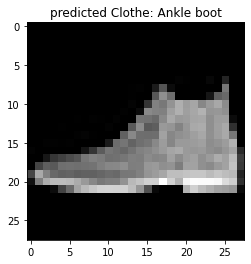

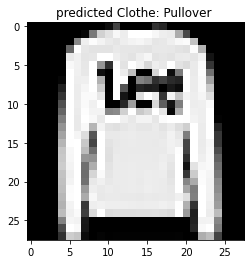

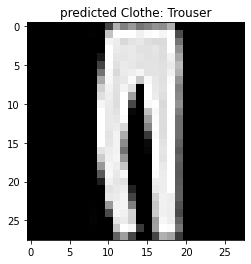

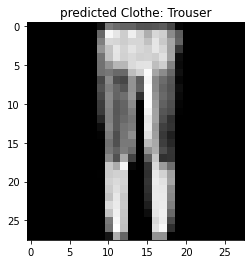

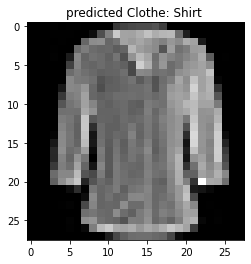

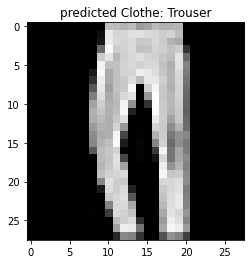

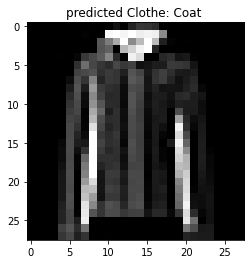

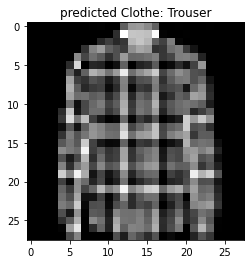

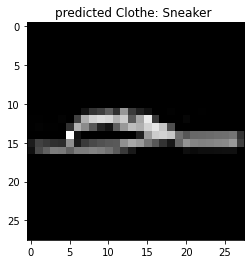

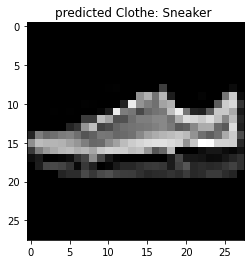

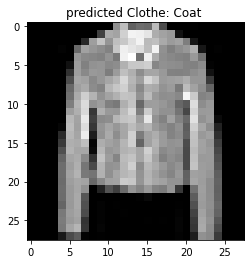

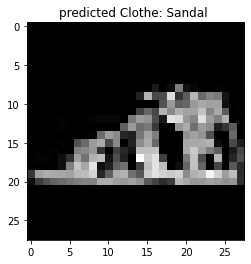

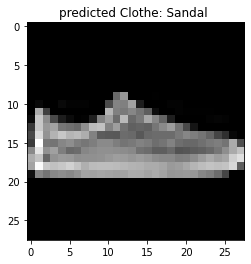

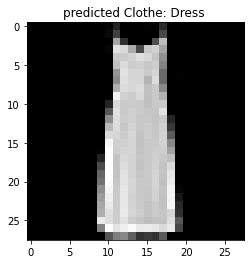

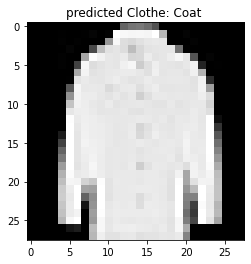

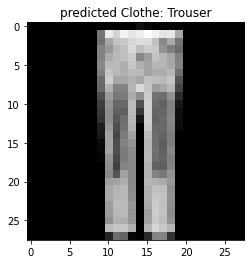

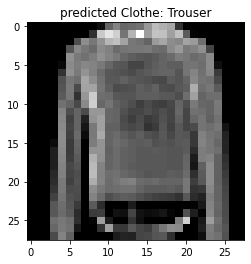

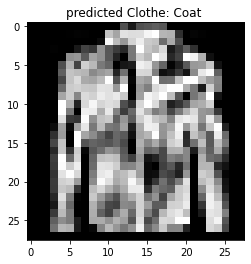

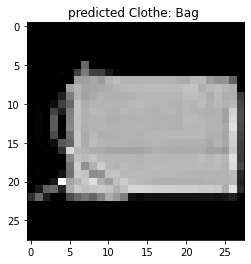

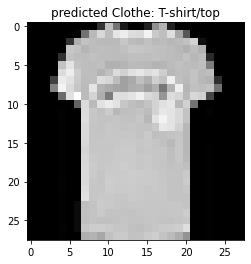

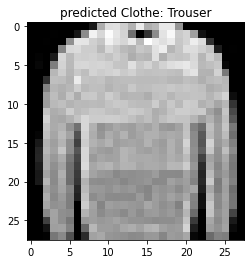

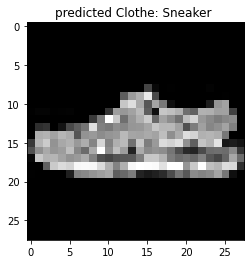

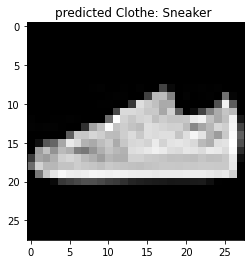

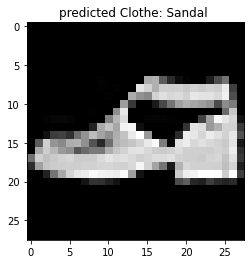

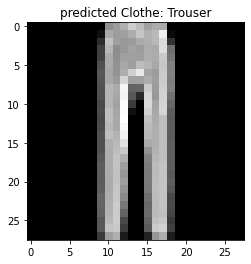

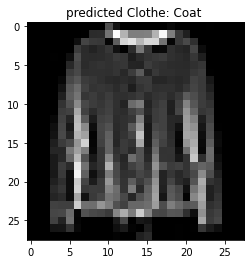

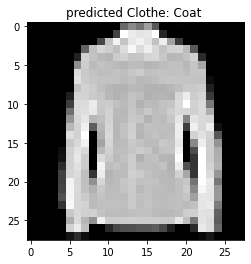

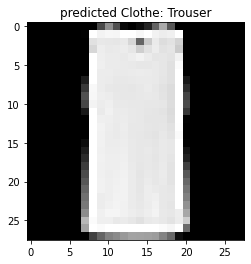

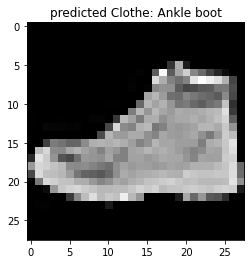

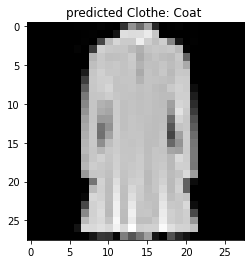

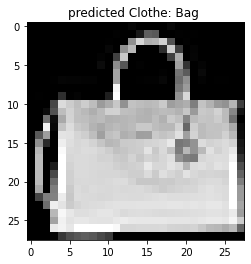

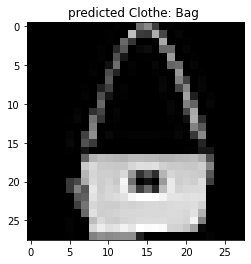

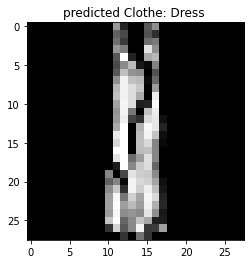

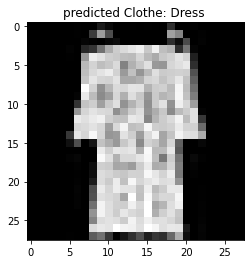

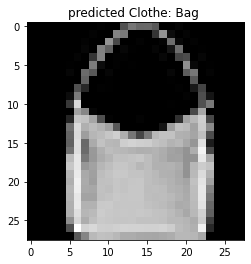

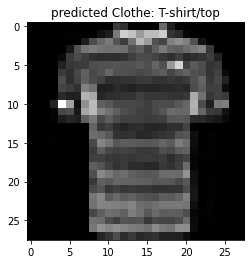

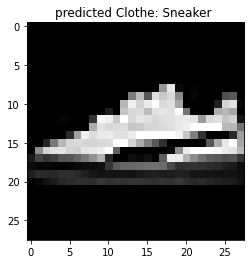

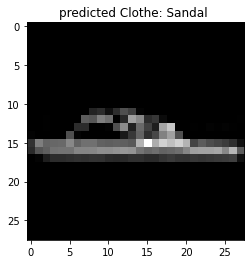

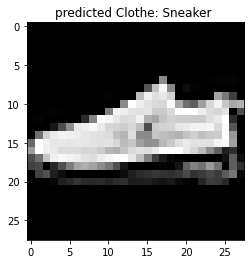

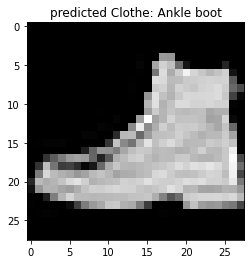

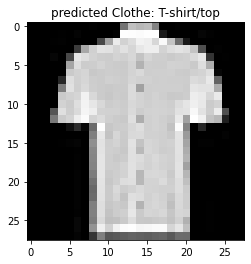

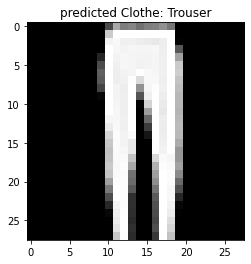

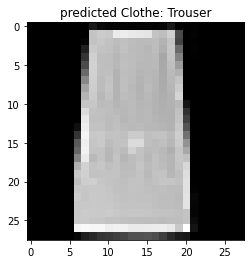

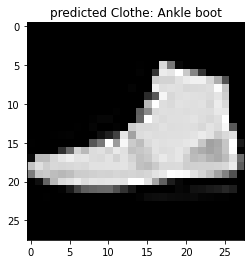

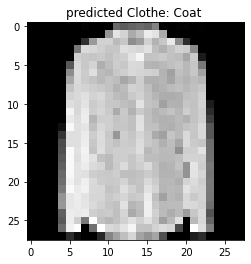

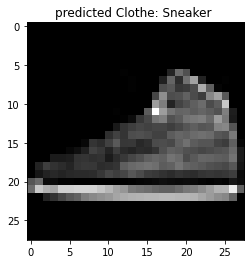

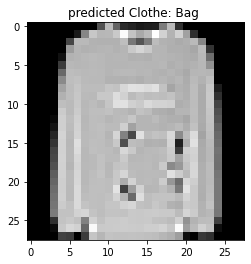

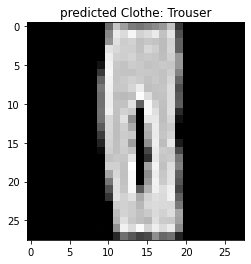

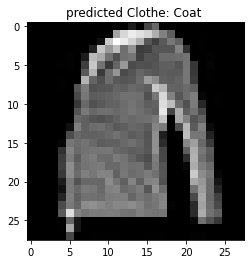

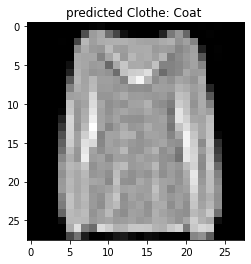

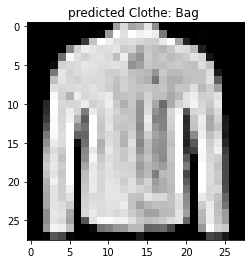

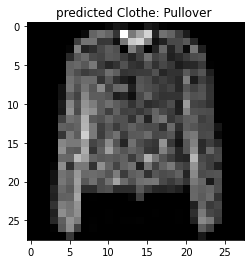

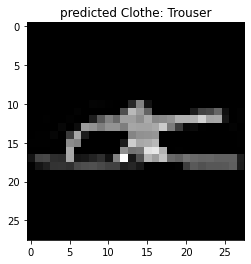

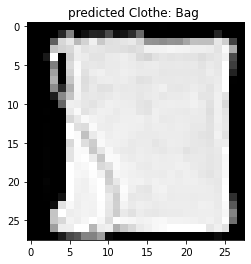

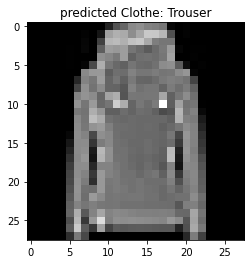

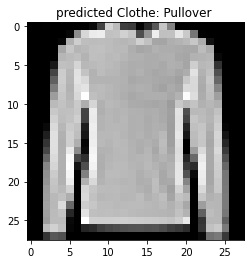

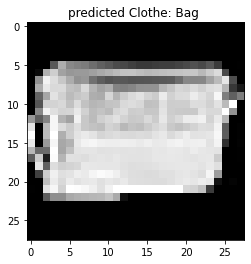

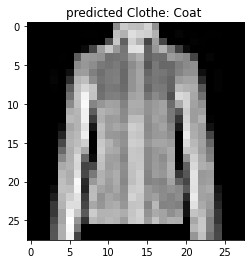

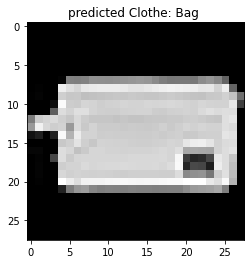

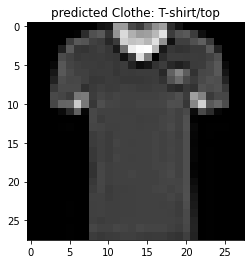

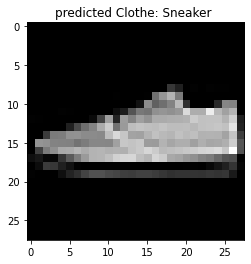

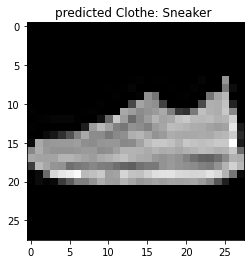

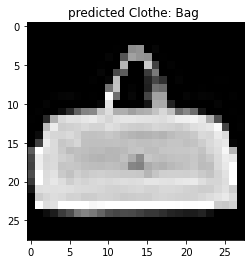

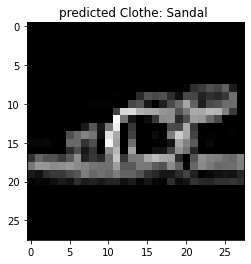

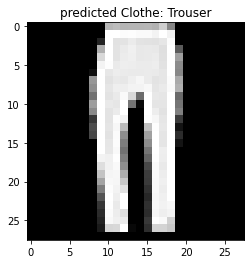

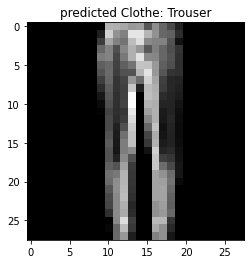

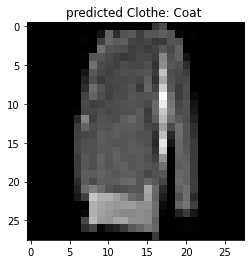

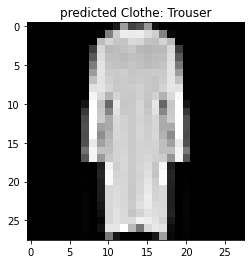

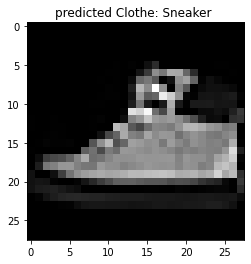

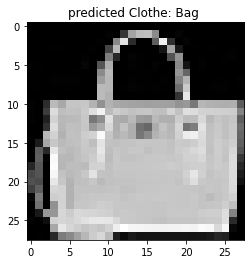

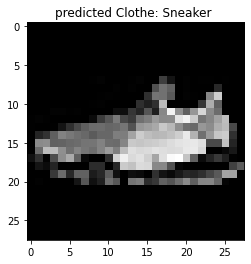

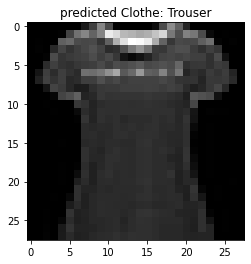

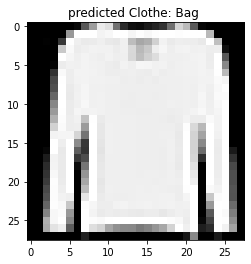

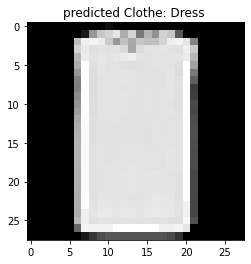

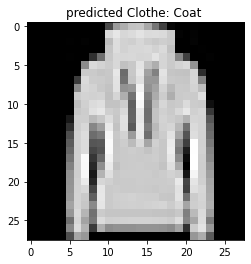

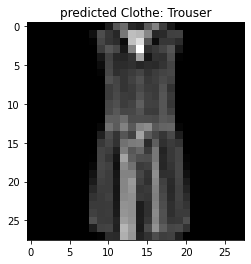

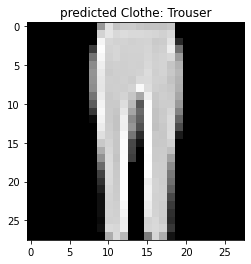

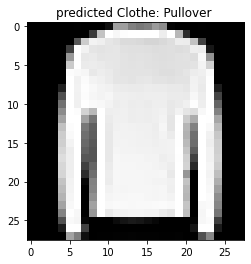

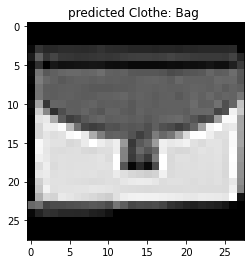

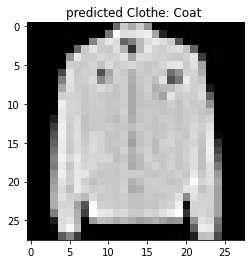

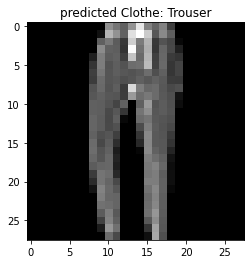

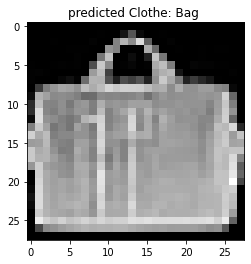

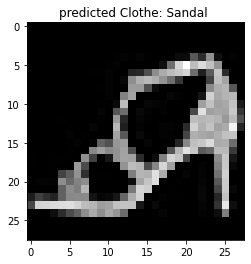

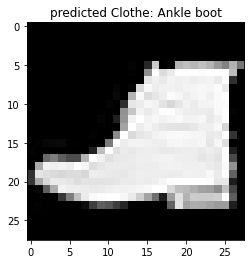

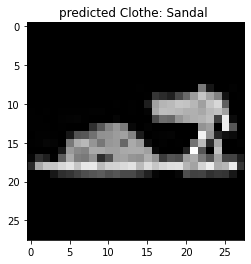

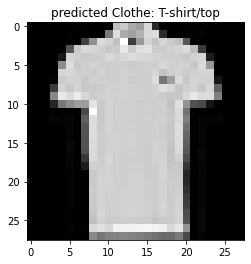

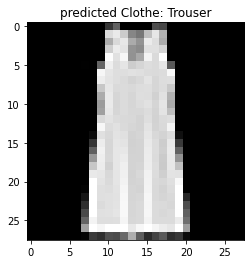

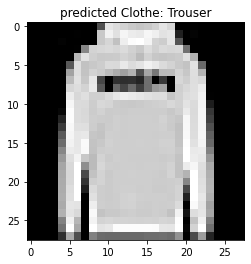

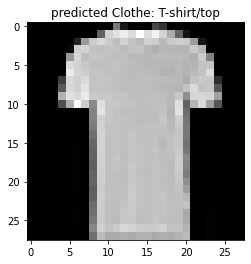

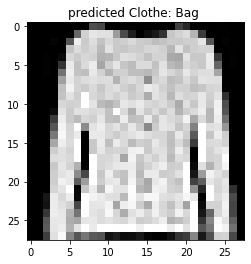

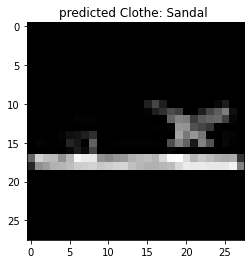

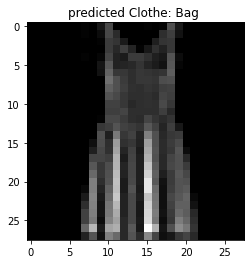

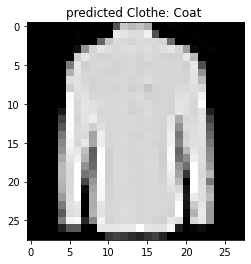

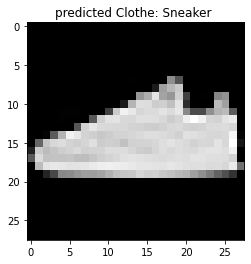

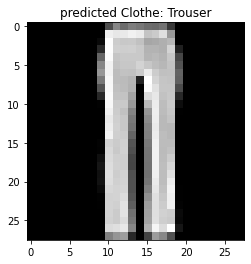

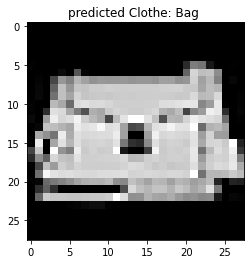

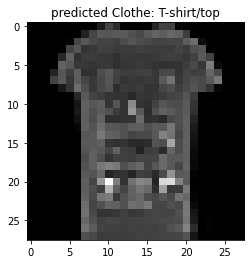

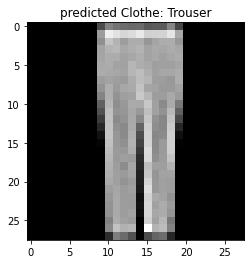

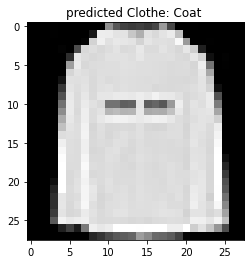

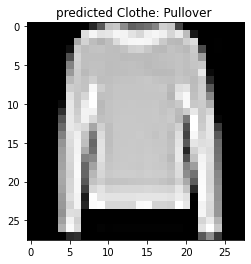

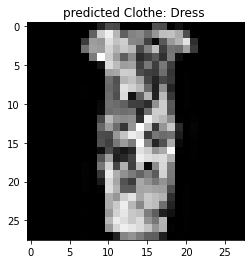

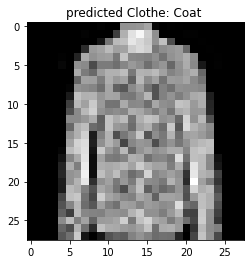

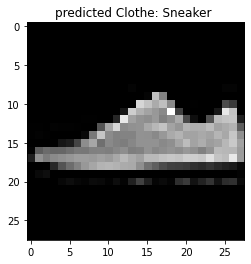

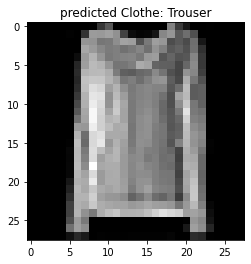

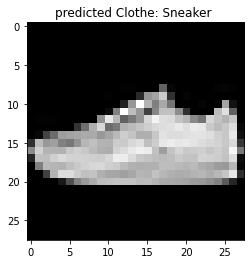

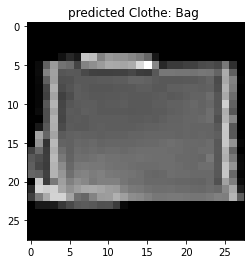

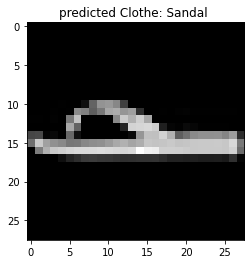

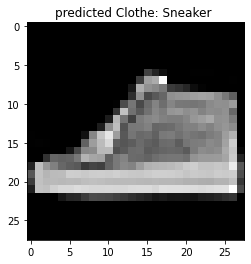

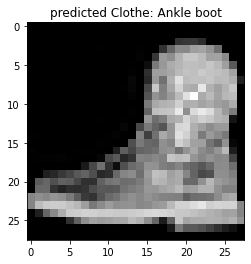

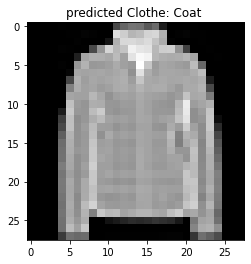

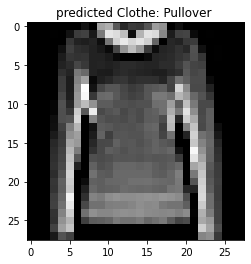

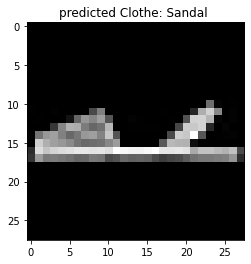

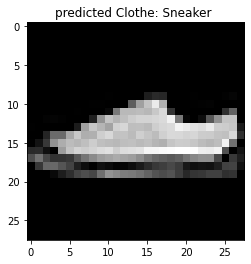

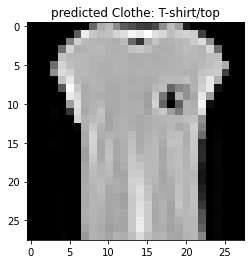

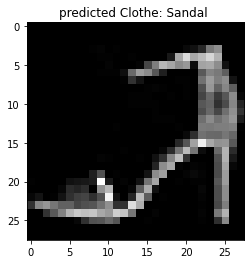

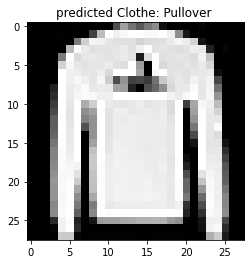

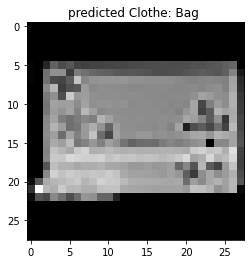

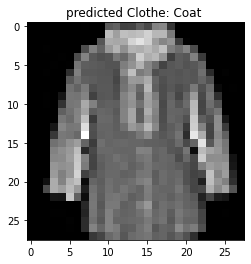

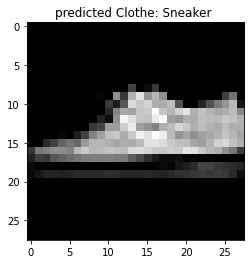

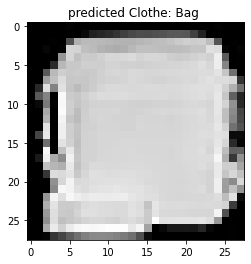

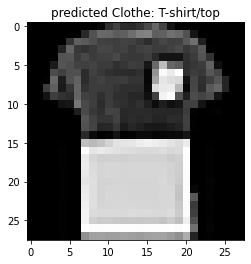

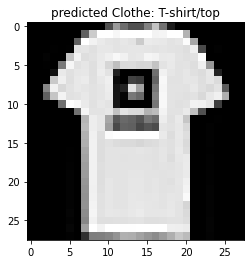

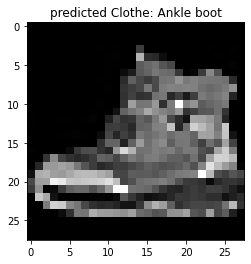

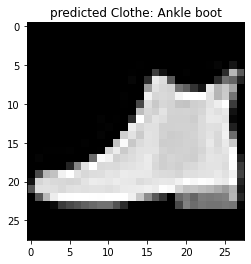

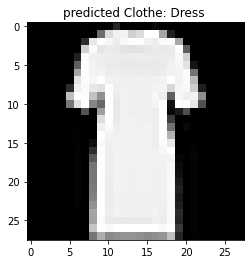

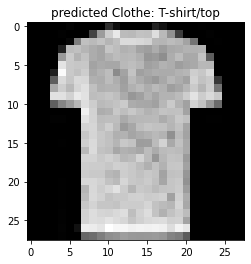

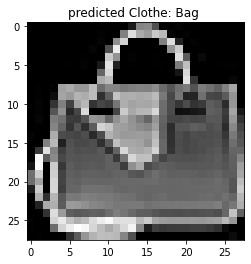

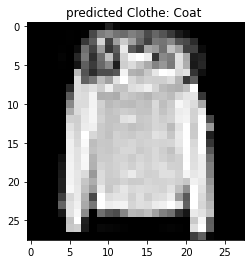

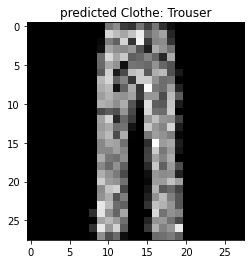

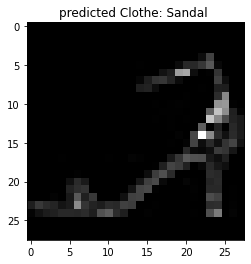

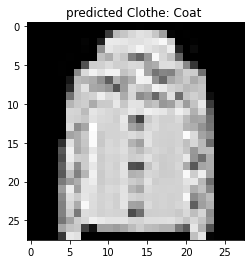

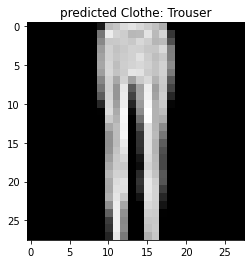

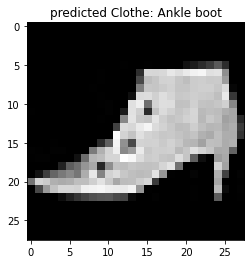

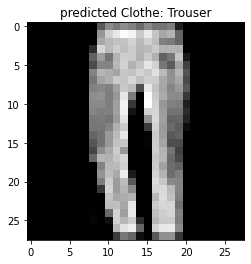

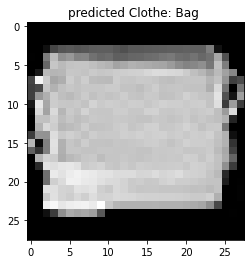

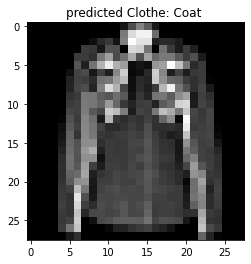

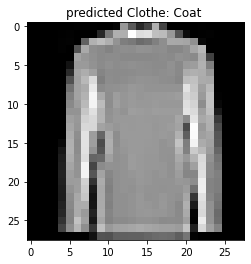

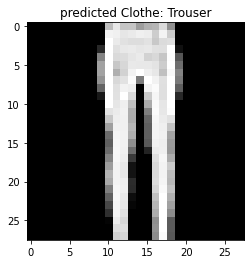

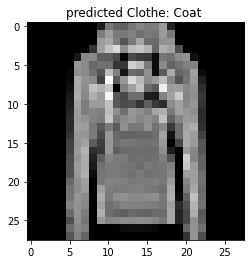

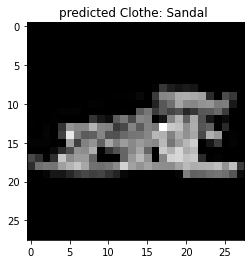

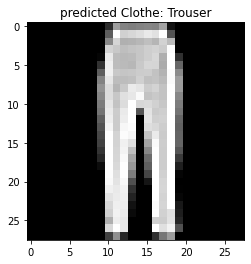

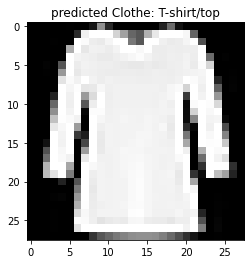

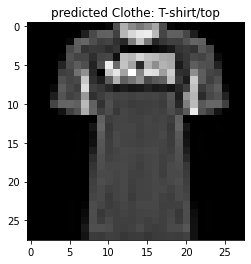

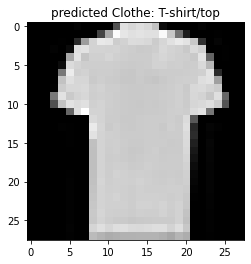

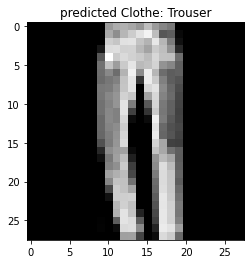

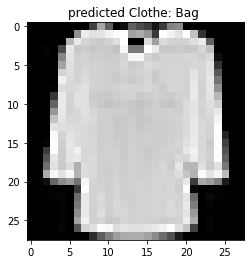

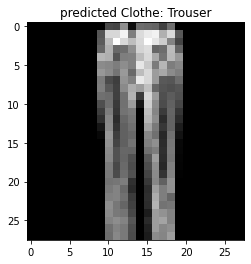

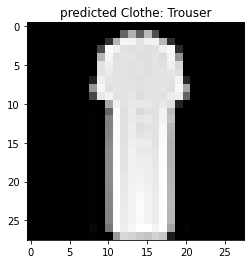

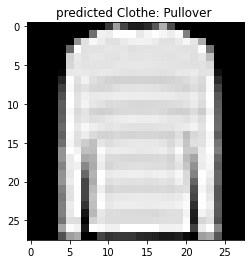

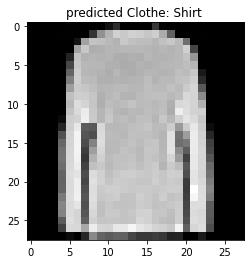

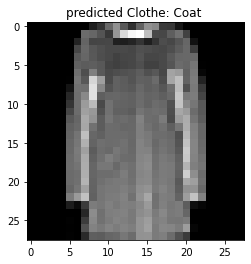

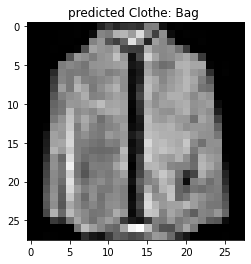

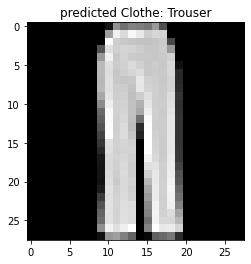

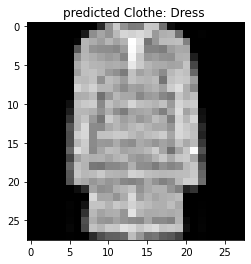

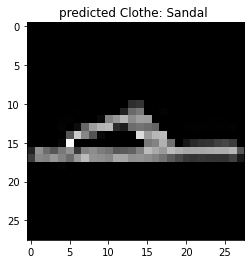

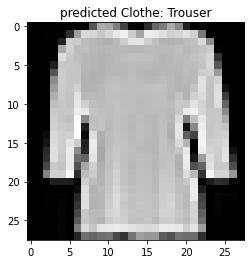

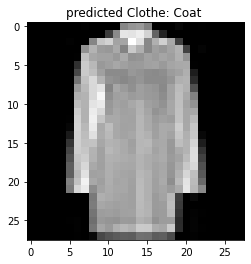

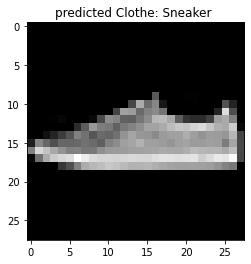

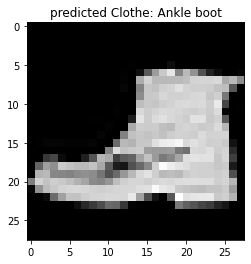

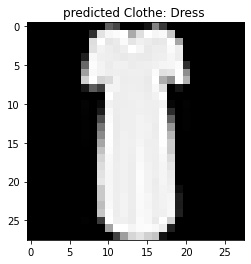

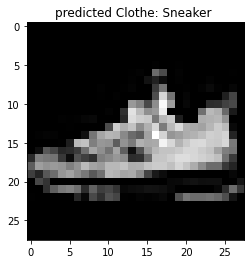

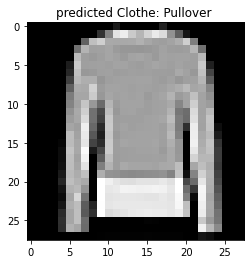

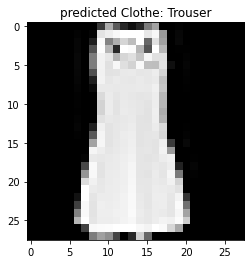

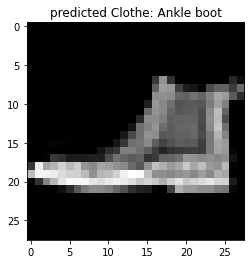

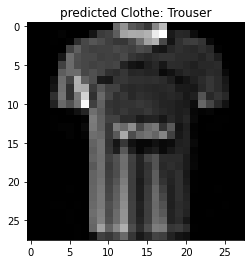

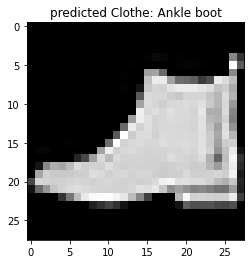

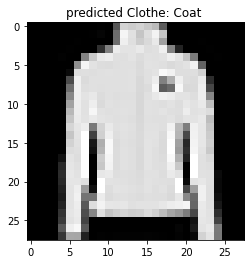

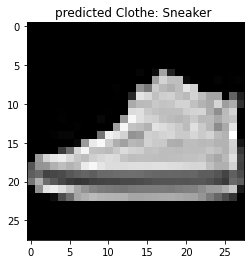

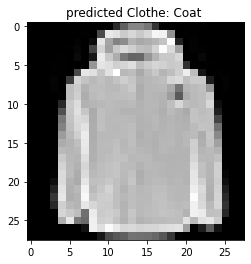

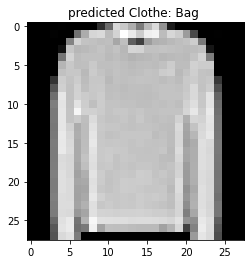

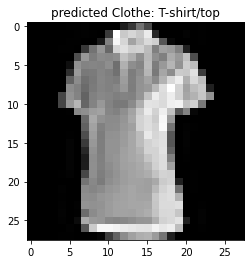

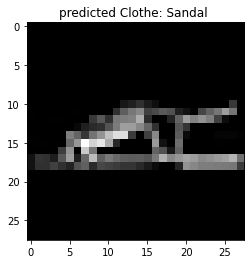

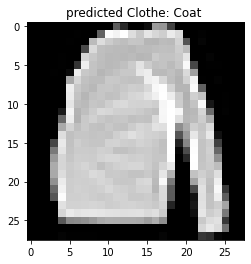

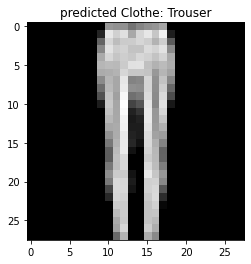

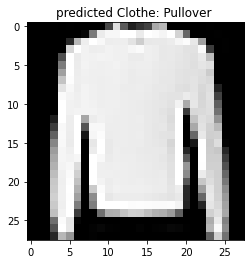

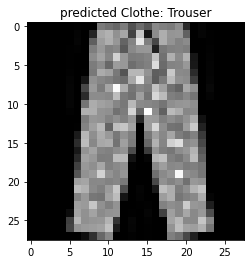

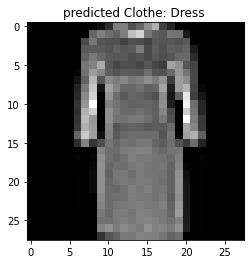

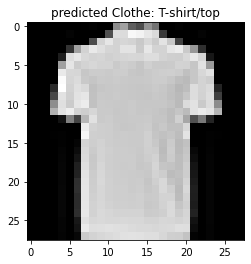

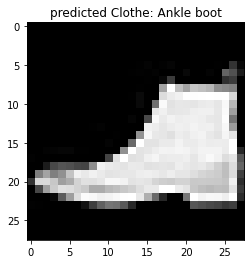

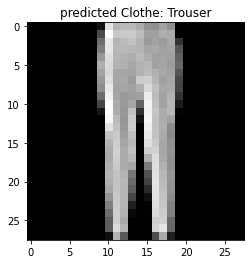

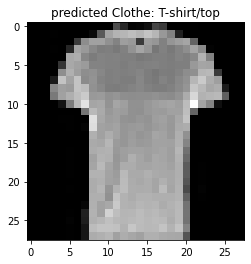

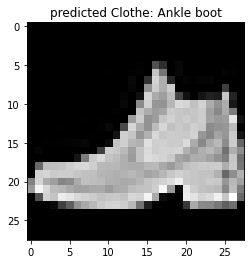

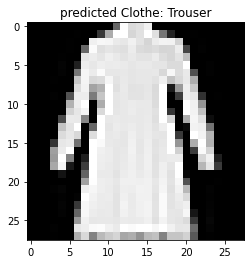

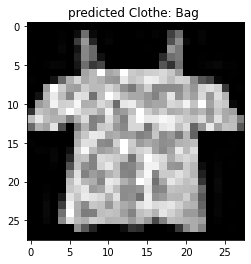

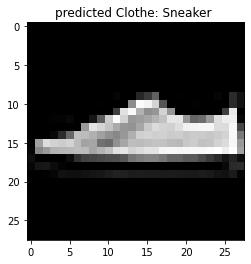

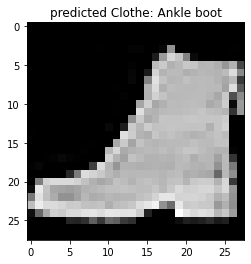

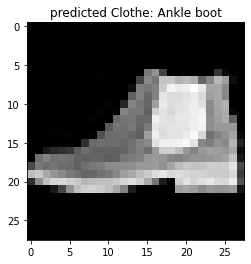

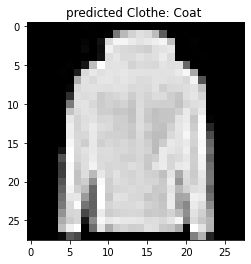

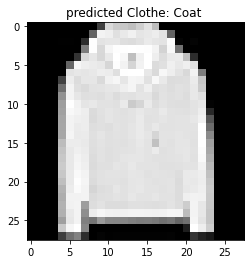

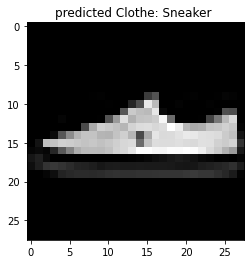

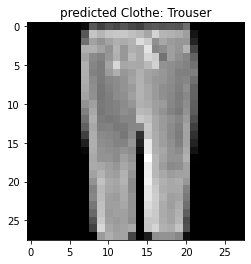

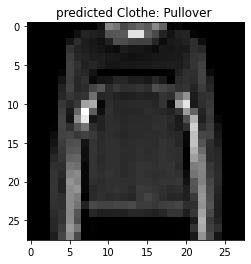

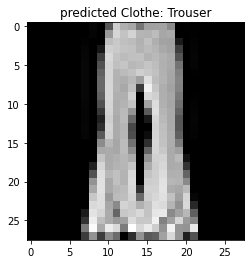

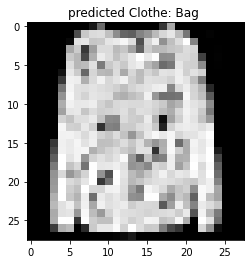

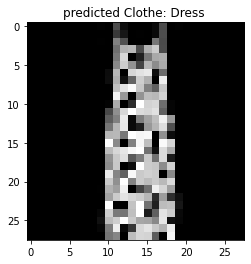

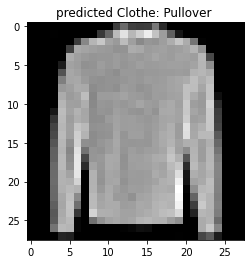

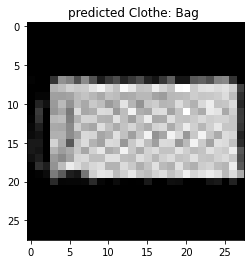

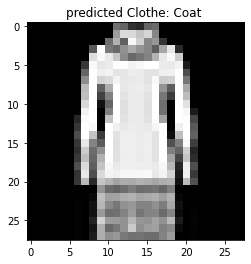

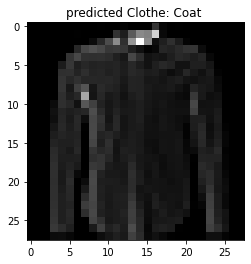

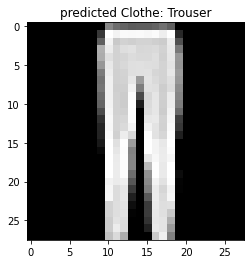

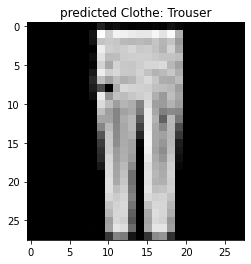

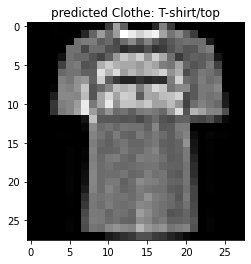

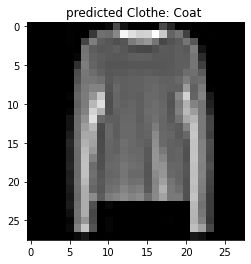

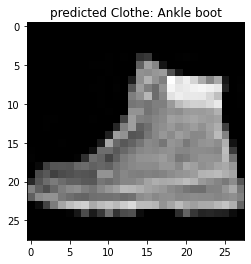

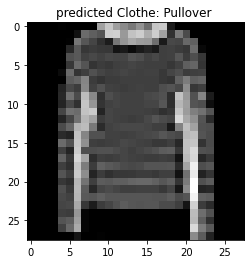

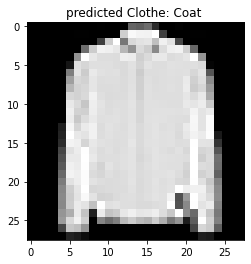

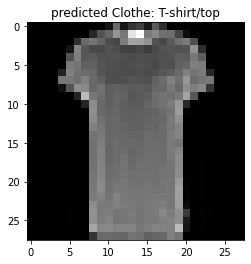

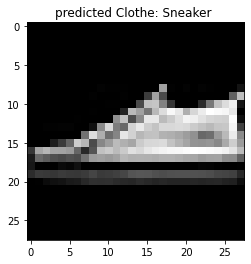

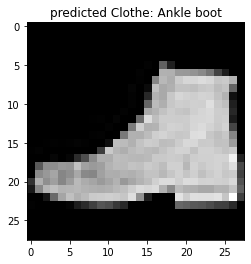

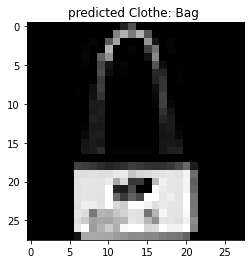

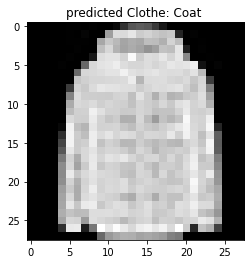

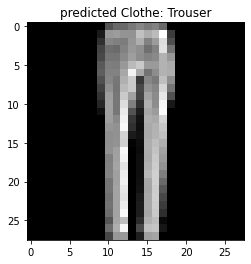

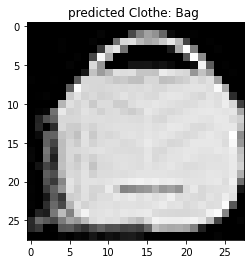

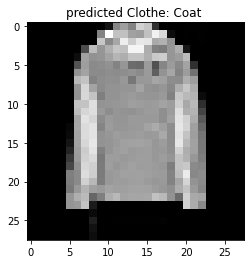

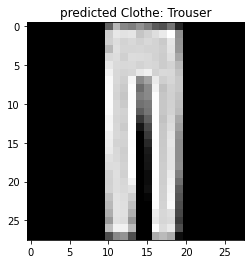

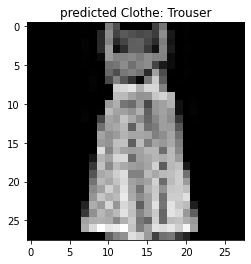

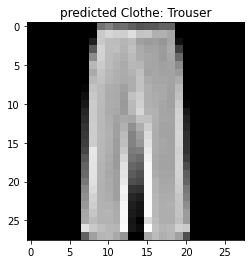

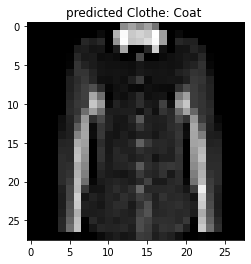

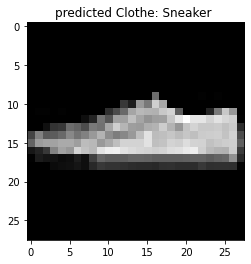

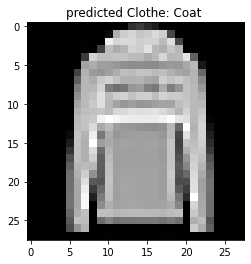

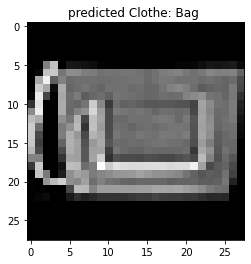

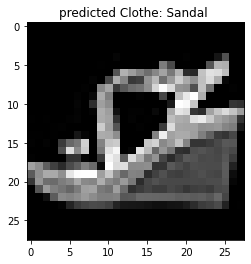

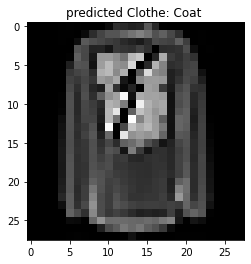

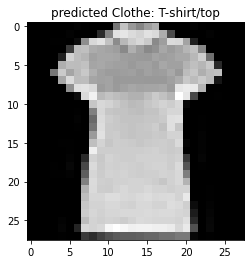

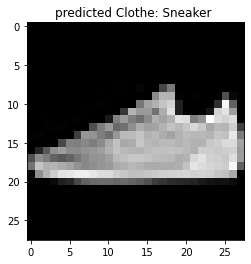

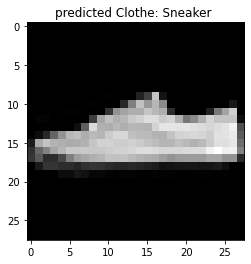

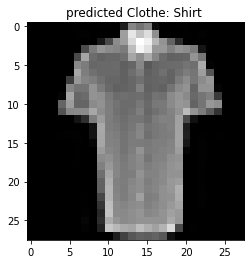

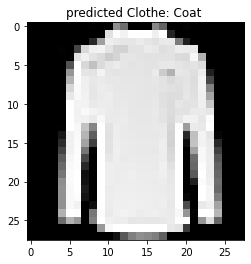

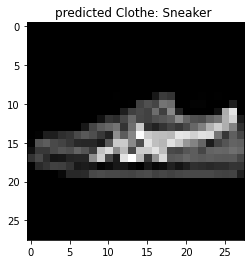

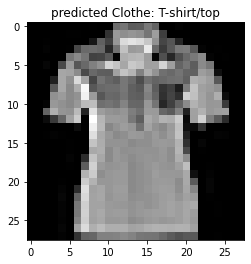

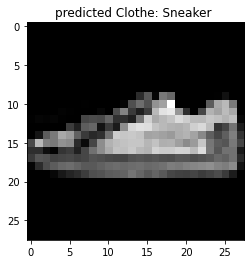

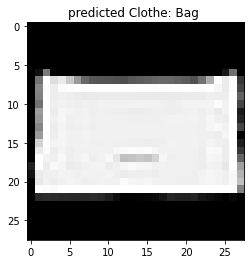

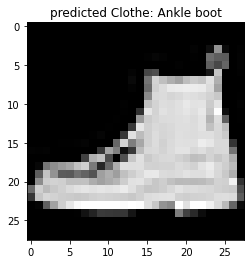

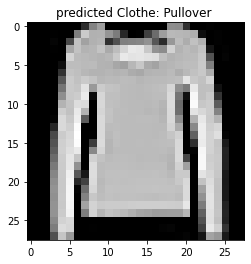

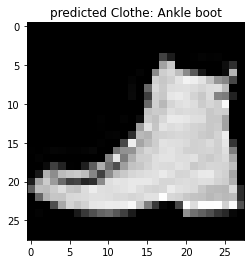

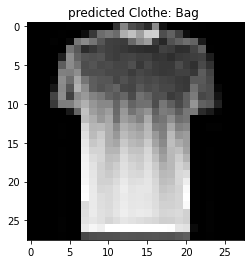

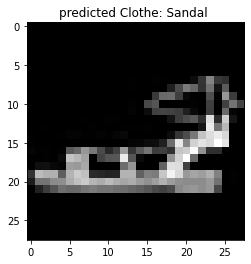

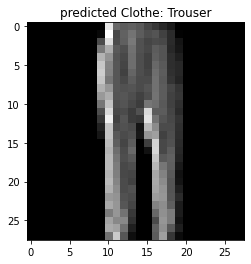

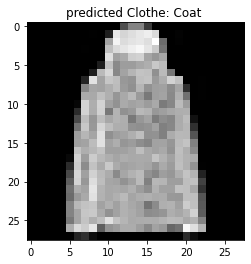

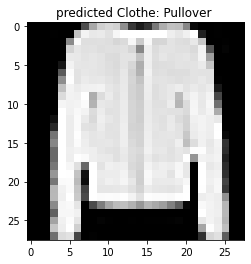

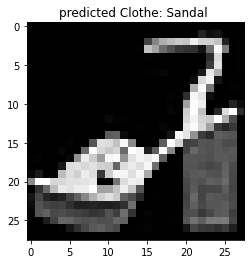

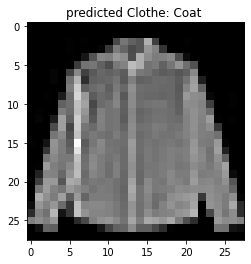

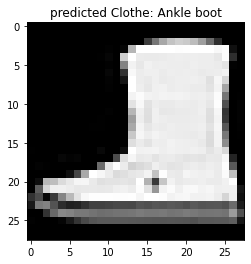

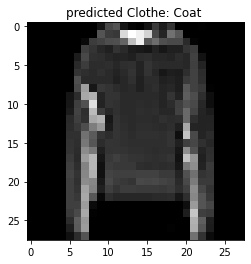

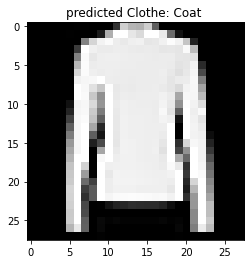

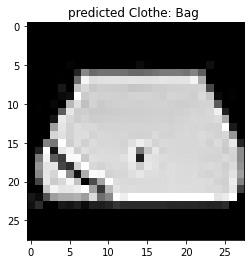

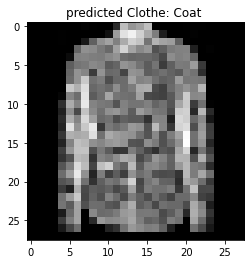

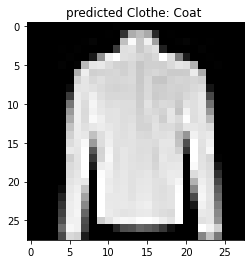

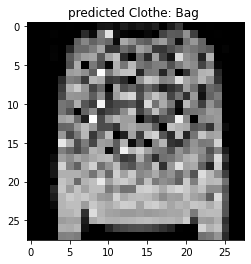

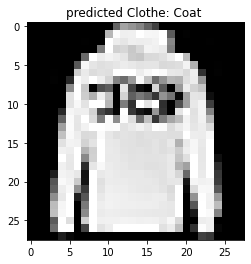

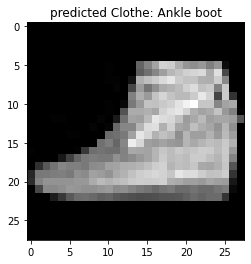

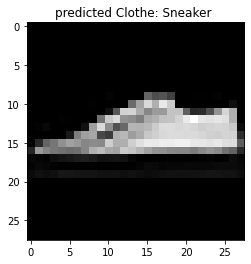

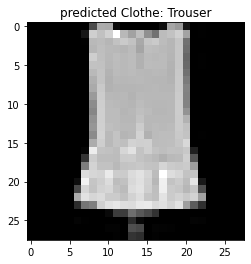

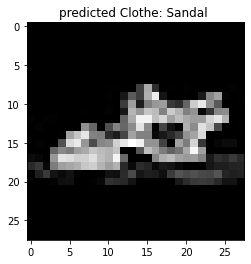

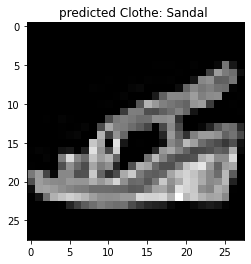

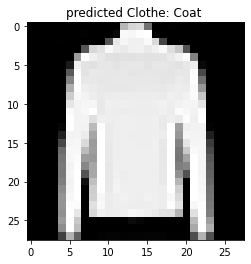

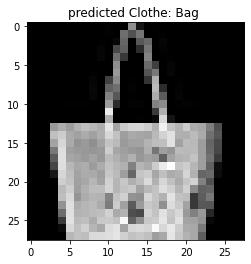

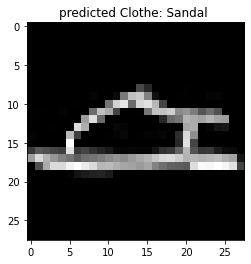

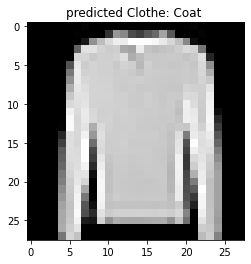

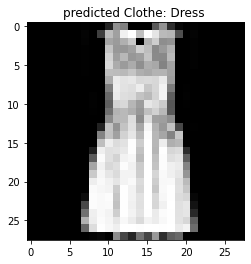

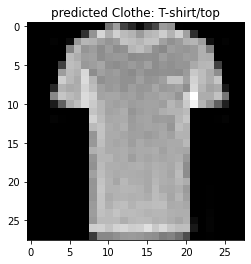

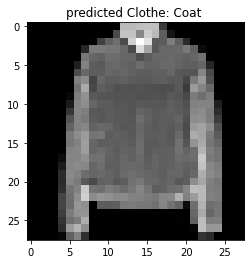

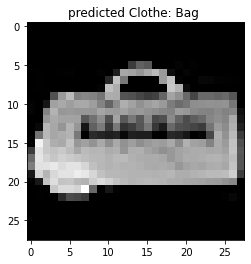

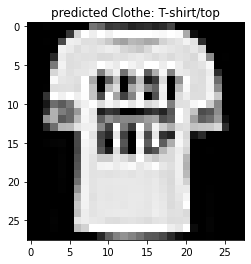

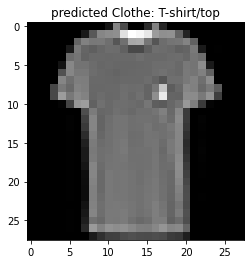

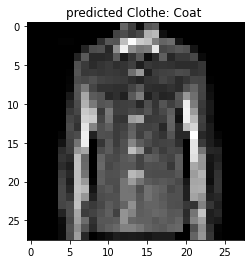

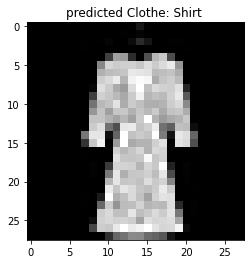

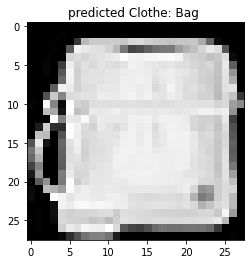

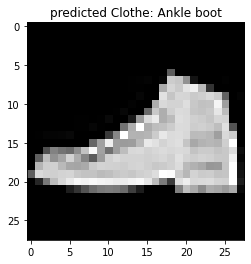

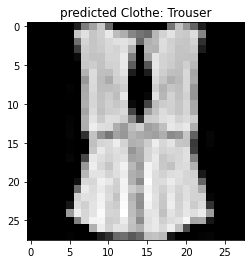

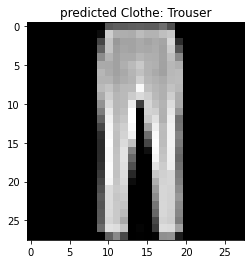

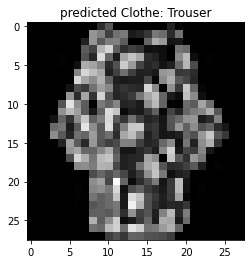

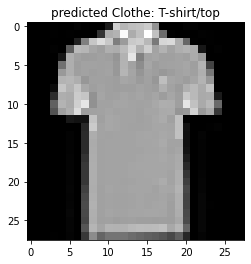

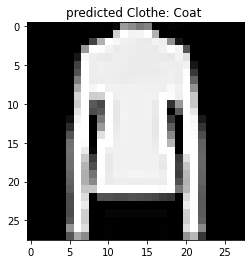

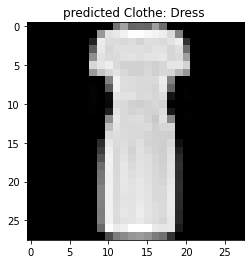

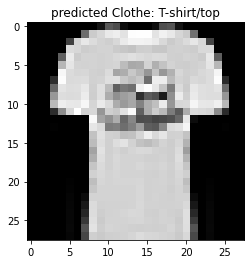

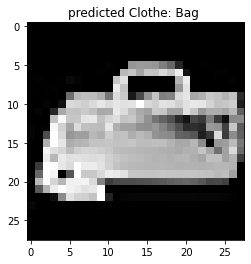

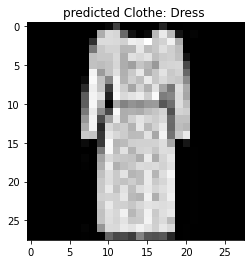

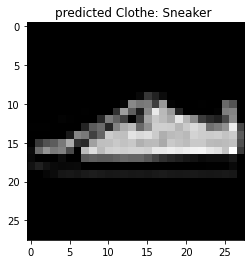

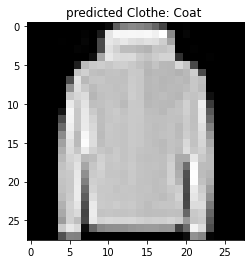

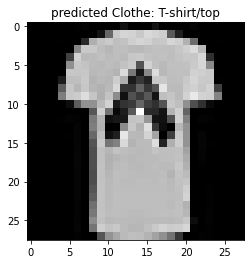

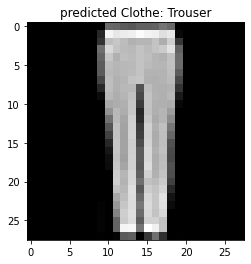

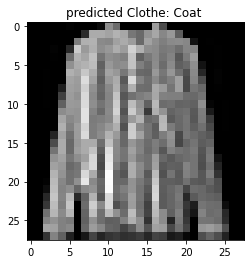

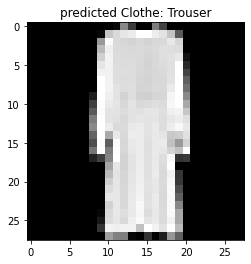

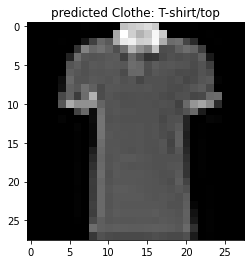

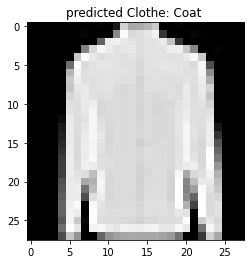

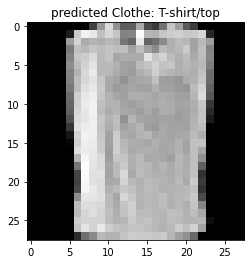

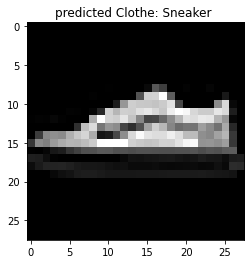

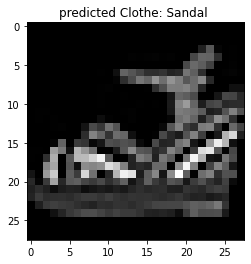

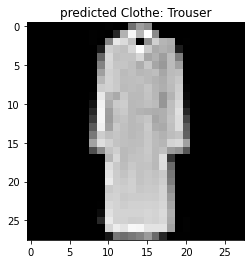

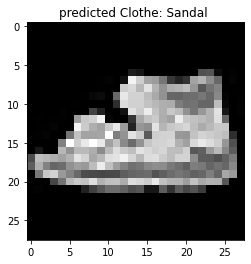

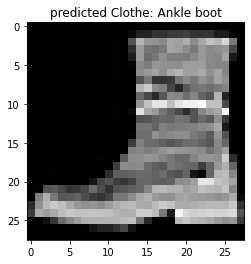

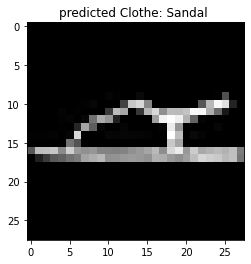

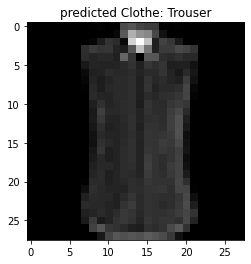

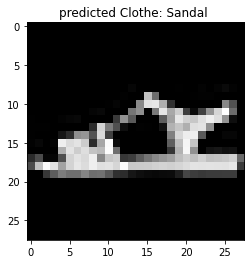

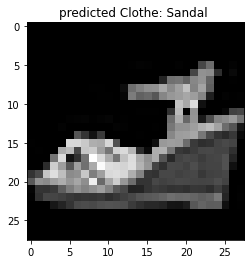

KeyboardInterrupt: 

In [222]:
for img_numbers, (data, target) in enumerate(test_dataset):

    data = data.view((-1, 28*28))
    data = data.view((-1, 28*28))

    activations = torch.matmul(data, weights)
    softmax = F.softmax(activations, dim=1)
    prediction = softmax.argmax(dim=1, keepdim=True)

    plt.imshow(data[0].view(28, 28), cmap='gray')
    plt.title(f"predicted Clothe: {label_dic[prediction.item()]}")
    plt.show()


	This is a markdown cell for you to document your thought and research process